# Learning Theory Homework 
***
**Name**: $Akriti Kapur$ 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

Notice that there a finite number of concepts in $C$.  In the consistent case we can then use the bound 

$$
m \geq \frac{1}{\epsilon}\left(\ln\left| H \right| + \ln\frac{1}{\delta} \right)
$$

For making any triangle we need to choose any 3 points out of the given 100 X 100 grid

Then, we get 
$$
{{10000}\choose{3}} = 
 = \frac{10000\times 999\times 998}{3\times 2} = 16616670000
$$

Then $\log|H|$ becomes,
$$
\quad \Rightarrow \quad \log\left| H \right| \approx 21.23 
$$

Plugging this into the equation, we get, 

$$
m \geq \frac{1}{\epsilon}\left(21.23 + \ln\frac{1}{\delta} \right)
$$

Proof for a single specific hypothesis for a concept, 

### For a non degenerate triangle
We can divide this gap into 3 regions (Similar to the rectangle example in the in class notebook) 

WLOG, Assume that the probability of landing in any missed interval is $\epsilon$ / 3. 
Then,

(**Proof Adopted from the inclass notebook**)

The statement that $P[R(h) > \epsilon]$ is equivalent to the probability that no point in the training set fell into the missed region.  Thus, by the Union Bound, we have 

$$
\begin{eqnarray}
P[R(h) > \epsilon] &=& P[\textrm{no } {\bf x}_i \textrm{ fell in } r_1 \textrm{ OR } r_2 \textrm{ OR } r_3]
\end{eqnarray}
$$

By construction, the probability that a single point did not fall in a particular region is $(1-\epsilon/3)$, and thus the probability that none of the $m$ points fell in a particular region is $(1-\epsilon/3)^m$.  Using the Union bound, and these probabilities, we have 

$$
\begin{eqnarray}
P[R(h) > \epsilon] &=& P[\textrm{no } {\bf x}_i \textrm{ fell in } r_1 \textrm{ OR } r_2 \textrm{ OR } r_3] \\
&\leq& \left(1 - \frac{\epsilon}{3}\right)^m + \left(1 - \frac{\epsilon}{3}\right)^m + \left(1 - \frac{\epsilon}{3}\right)^m  \\
&=& 3\left(1 - \frac{\epsilon}{3}\right)^m \\
&\leq& 3e^{-m\epsilon/3}
\end{eqnarray}
$$

where the last step follows from the exponential trick.  Now, we want to choose $m$ such that this upper bound on the probability that $h$ *is bad* is bounded above by $\delta$.  We then have


$$
3e^{-m\epsilon/3} < \delta \quad \Rightarrow \quad \frac{-m\epsilon}{3} < \ln \frac{\delta}{3} \quad \Rightarrow \quad m > \frac{3}{\epsilon}\ln\frac{3}{\delta}
$$


Thus, for any $\epsilon > 0$ and $\delta > 0$ choosing $m$ greater than $(3/\epsilon)\ln(\delta/3)$ ensures that $P[R(h) \leq \epsilon] \geq 1 - \delta$ 

### For a degenerate triangle

The bound will be the same as Frank the alien example that is,

$$
m > \frac{2}{\epsilon}\ln\frac{2}{\delta}
$$



Taking the higher of the two,

$$
m > \frac{3}{\epsilon}\ln\frac{3}{\delta}
$$
 

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

From above, we get, 
$$
m = \frac{1}{\epsilon}\left(21.23 + \ln\frac{1}{\delta} \right) = \frac{1}{0.15}\left(21.23 + \ln\frac{1}{0.05} \right) = 161.5 = 162
$$


### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

In [69]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches

def get_circle_hypothesis(points_x, points_y, labels, title, radius=3):
    plt.figure()
    ax2 = plt.subplot(111, )

    ax2.add_patch(
        patches.Circle(
            (0, 0),
            radius,
            color=mycolors["red"],
            lw=2,
            fill=False  # remove background
        )
    )

    ax2.scatter(points_x, points_y, color=[color_map[label] for label in labels], marker='o')
    plt.title(title)
    ax2.axis('equal')
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.show()
    




Using hypothesis 1


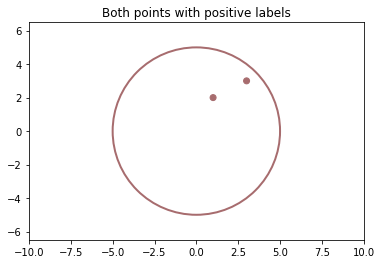

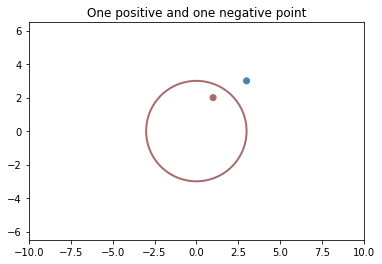

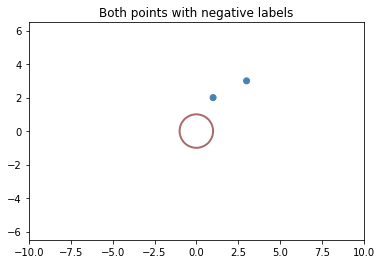

Using hypothesis(second case)


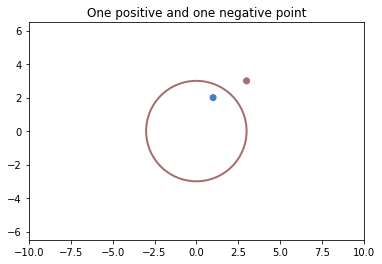

In [71]:
def get_plots():
    print("Using hypothesis 1")
    points_x = [1, 3]
    points_y = [2, 3]
    get_circle_hypothesis(points_x, points_y, [POSITIVE_LABEL, POSITIVE_LABEL], "Both points with positive labels", 5)

    points_x = [1, 3]
    points_y = [2, 3]
    get_circle_hypothesis(points_x, points_y, [POSITIVE_LABEL, NEGATIVE_LABEL], "One positive and one negative point")

    points_x = [1, 3]
    points_y = [2, 3]
    get_circle_hypothesis(points_x, points_y, [NEGATIVE_LABEL, NEGATIVE_LABEL], "Both points with negative labels", 1)
    
    print("Using hypothesis(second case)")

    points_x = [1, 3]
    points_y = [2, 3]
    get_circle_hypothesis(points_x, points_y, [NEGATIVE_LABEL, POSITIVE_LABEL], "One positive and one negative point")


get_plots()



Here hypothesis 1 and 2 mean different cases of the hypothesis (that is if the hypothesis is inverted)

** PART 1 **
We see from the above diagrams, that both the hypothesis together shatter the given configuration of 2 points.
This means that VCdim(H) >= 2.

** PART 2 ** 

Let x1, x2, x3 be points present at radius r1, r2 and r3

Let the radius of the hypothesis be R

WLOG, assume, r1 <= r2 <= r3 ----- 1 (radius(from the center) at which the points are located)

The labels for the points in order are [y1, y2, y3] = [+1, -1, +1]

While considering the **first hypothesis**, 

Since x3 is positive(y3 = +1) this means that radius of the hypothesis has to be r3 atleast
that is, R >= r3

But, since r2 <= r3  (from 1)
this means that the label of x2 should be positive but this is a contradiction since y2 = -1.

Now considering the **second hypothesis**,

Since x2 is negative then,
    r2 < R
 
(so that the negative point lies inside the circle)

But according to 1,
    r1 <= r2
   
this means that x1 lies inside the hypothesis => label for x1 is -1

but this is a contradiction since y1 = +1

This means that no configuration of 3 points can be shattered.

From Part 1 and Part 2,
    3 > VCDim >= 2

Hence,
#### VCDim = 2



### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [64]:
from collections import OrderedDict

POSITIVE_LABEL = 1
NEGATIVE_LABEL = 0
LOW_VALUE = 0.0000000000001

TRAINING_SIZE = [250, 500, 1000, 1250, 1500]
mycolors = {"blue":"steelblue", "red":"#a76c6e",  "green":"#6a9373", "smoke":"#f2f2f2"}

color_map = {POSITIVE_LABEL: mycolors['red'], NEGATIVE_LABEL: mycolors['blue']}


def generate_rectangle(x_upper_bound, y_upper_bound):

    x = np.random.rand(1, 2) * 100
    y = np.random.rand(1, 2) * 100


    x = np.sort(x[0])
    y = np.sort(y[0])

    rectangle_dimensions = [x[0], x[1], y[0], y[1]]
    return rectangle_dimensions


def draw_rectangle(rectangle_dimensions, h_rectangle_dimensions, points_x, points_y, labels):
    x1, x2, y1, y2 = rectangle_dimensions
    hx1, hx2, hy1, hy2 = h_rectangle_dimensions


    rect = plt.figure()
    ax2 = plt.subplot(111, )

    ax2.add_patch(
        patches.Rectangle(
            (x1, y1),
            (x2-x1),
            (y2-y1),
            lw=2,
            color="green",
            fill=False  # remove background
        )
    )

    ax2.add_patch(
        patches.Rectangle(
            (hx1, hy1),
            (hx2 - hx1),
            (hy2 - hy1),
            lw=2,
            color="cyan",
            fill=False  # remove background
        )
    )

    ax2.scatter(points_x, points_y, color=[color_map[label] for label in labels], marker='o')
    plt.xlim([0, 100])
    plt.ylim([0, 100])
    plt.show()


def label_points(rectangle_dimensions, points_x, points_y):
    x1, x2, y1, y2 = rectangle_dimensions
    labels = []

    for i in range(0, len(points_x)):
        point_x, point_y = points_x[i], points_y[i]
        point_label = POSITIVE_LABEL

        if point_x > x2 or point_x < x1 or point_y > y2 or point_y < y1:
            point_label = NEGATIVE_LABEL
        labels.append(point_label)

    return np.array(labels)


def get_random_points(x_upper_bound, y_upper_bound, m):
    x = np.random.rand(1, m) * 100
    y = np.random.rand(1, m) * 100

    return list(x[0]), list(y[0])


def get_random_normal_points(mu, sigma, m):
    x = np.random.normal(mu, sigma, m)
    y = np.random.normal(mu, sigma, m)

    return x, y


def get_hypothesis(points_x, points_y, labels):
    """
        Hypothesis is the most closely bound rectangle to the training examples
        that are positive. (whose label is 0)
    :return: Hypothesis rectangle coordinates
    """

    # Get all positive label indices
    positive_indices = np.argwhere(labels == POSITIVE_LABEL)

    points_x = np.array(points_x)
    points_y = np.array(points_y)
    x = points_x[positive_indices]
    y = points_y[positive_indices]

    if not list(x):
        x = np.array([1])
    if not list(y):
        y = np.array([1])

    rectangle_dimensions = [min(x), max(x), min(y), max(y)]
    return rectangle_dimensions


def get_generalization_error(rectangle_dimensions, h_rectangle_dimensions, test_points_x, test_points_y):
    """
    generalization_error = No of wrongly classified examples / total examples
    :return: {Float} Generalization error
    """
    labels = label_points(rectangle_dimensions, test_points_x, test_points_y)
    pred_labels = label_points(h_rectangle_dimensions, test_points_x, test_points_y)

    count_incorrect = np.sum(labels != pred_labels)
    total_samples = len(labels)
    return count_incorrect / total_samples




For training examples


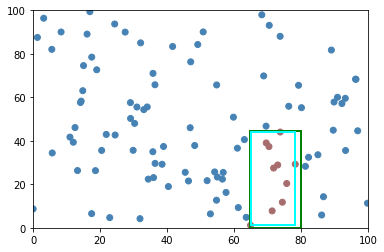

generalization error:  0.017
For Validation/test examples


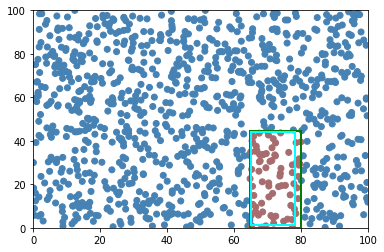

In [65]:
# Running for one concept
rect_dimensions = generate_rectangle(100, 100)
points_x, points_y = get_random_points(100, 100, 100)
labels = label_points(rect_dimensions, points_x, points_y)
h_rect_dimensions = get_hypothesis(points_x, points_y, labels)
print("For training examples")
draw_rectangle(rect_dimensions, h_rect_dimensions, points_x, points_y, labels)

test_points_x, test_points_y = get_random_points(100, 100, 1000)
test_labels = label_points(rect_dimensions, test_points_x, test_points_y)
get_generalization_error(rect_dimensions, h_rect_dimensions, test_points_x, test_points_y)

print("generalization error: ", get_generalization_error(rect_dimensions, h_rect_dimensions, test_points_x, test_points_y))
print("For Validation/test examples")
draw_rectangle(rect_dimensions, h_rect_dimensions, test_points_x, test_points_y, test_labels)

**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

OrderedDict([(250, -3.573796202816371), (500, -4.1997050778799272), (1000, -4.7105307016459177), (1250, -4.8283137373023015), (1500, -5.1159958097540823)])


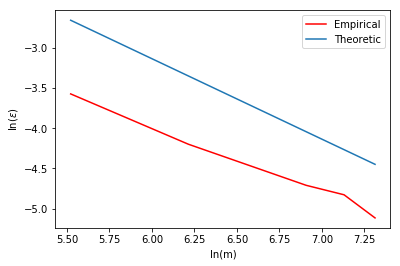

In [66]:
def construct_graph(eta, delta):
    training = np.array([m[0] for m in eta.items()])
    training = np.log(training)
    gen_error = [e[1] for e in eta.items()]
    theoretic_result = [4/m[0]*np.log(4/delta) for m in eta.items()]
    theoretic_result = np.log(theoretic_result)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.plot(training, gen_error, color="red", label="Empirical")
    plt.plot(training, theoretic_result, label="Theoretic")
    
    plt.xlabel('ln(m)')
    plt.ylabel('ln($\epsilon$)')
    plt.legend()

    plt.show()

def run_simulations(num_sim, delta, distribution="uniform"):
    percentile = (1-delta) * 100
    per_gen_error = OrderedDict()
    for size in TRAINING_SIZE:
        gen_error = []
        for i in range(num_sim):
            rect_dimensions = generate_rectangle(100, 100)
            points_x, points_y = get_random_points(100, 100, size) if distribution == "uniform" \
                else get_random_normal_points(mu=50, sigma=25, m=size)
            labels = label_points(rect_dimensions, points_x, points_y)
            h_rect_dimensions = get_hypothesis(points_x, points_y, labels)

            test_points_x, test_points_y = get_random_points(100, 100, 1000) if distribution == "uniform" \
                else get_random_normal_points(mu=50, sigma=25, m=1000)
            eta = get_generalization_error(rect_dimensions, h_rect_dimensions, test_points_x, test_points_y)
            gen_error.append(eta if eta > 0 else LOW_VALUE)
        gen_error = np.array(np.log(gen_error))
        per_gen_error[size] = np.percentile(gen_error, percentile)

    print(per_gen_error)

    construct_graph(per_gen_error, delta)

run_simulations(500, 0.05)


We see the same trend in the empirical and the theoretical result, As we increase the number of examples the generalization error decreases almost linearly.

The graph shows that the lower bound on the generalization error for the theoretic results is greater than what we see empirically (for some training size m)


**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

OrderedDict([(250, -3.5065578973199818), (500, -4.0745419349259206), (1000, -4.7105307016459177), (1250, -4.9551685602956033), (1500, -5.1159958097540823)])


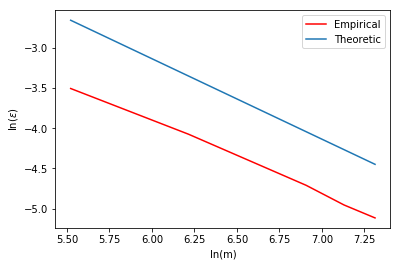

In [67]:
run_simulations(500, 0.05, "Gaussian")

1. The graphs of Part (A) and Part (B) are similar.

**Thoughts**
Gaussian distribution will sample more points in the range 25 - 75 (and points closer to 50 with higher probability). Therefore, if random concepts lie within this range, then the error should be less.
However, if there are any concept that are found beyond this range. Then, the generalization error will be more in this case. Therefore, this may be balancing the error resulting in almost the same generalization error as in with uniform distribtuion.

2. Given enough samples, the empirical and theoretical results will converge. (For both PART(A) and PART(B).
